In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# ############# Randomprojection
with open("randomprojection_100neurons_3parity_scripterrors_30/all_50_randomprojection_errors_dataframe.p", "rb")as inputfile:
    df = pd.DataFrame(pickle.load(inputfile))

0.326621710415 0.052325064572
0.47495500245 0.0346438907963


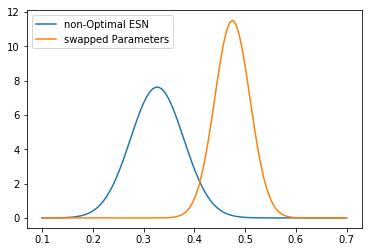

In [4]:
###################### swapped params
nonOptModulESN = df[(df["input_leak_rate"]==0.4111111111111111) & (df["input_spectral_rad"]==1.577777777777778) &
         (df["output_leak_rate"]==1.0333333333333334) & (df["output_spectral_rad"]== 1.577777777777778)]
swappedModulESN = df[(df["input_leak_rate"]==1.0333333333333334) & (df["input_spectral_rad"]==1.577777777777778) &
         (df["output_leak_rate"]==0.4111111111111111) & (df["output_spectral_rad"]== 1.577777777777778)]
errors_nonOpt=nonOptModulESN["errors"].tolist()[0]
errors_swapped=swappedModulESN["errors"].tolist()[0]
# print(errors_nonOpt)
# print(errors_swapped)
mean1 = nonOptModulESN["averaged_error"].iloc[0]
sigma1 = np.std(nonOptModulESN["errors"].tolist()[0])
var1= np.var(nonOptModulESN["errors"].tolist()[0])
mean2 = swappedModulESN["averaged_error"].iloc[0]
sigma2 = np.std(swappedModulESN["errors"].tolist()[0])
var2 = np.var(swappedModulESN["errors"].tolist()[0])
print(mean1, sigma1)
print(mean2, sigma2)

x1 = np.linspace(0.1,0.7, 100)
plt.plot(x1,mlab.normpdf(x1, mean1, sigma1),label="non-Optimal ESN")
x2 = np.linspace(0.1,0.7, 100)
plt.plot(x2,mlab.normpdf(x2, mean2, sigma2),label="swapped Parameters")
plt.legend()
plt.show()

In [8]:
def bootstrap_resample(data, num_samples=1000000, n=None):
    if(n==None):
        n = len(data)
    
    idx = np.random.randint(0, n, (num_samples, n))
    samples = data[idx]
    return samples

nonOpt_resample=bootstrap_resample(errors_nonOpt)
swapped_resample=bootstrap_resample(errors_swapped)
print("Error for nonOpt_resample:",nonOpt_resample.mean(axis=1)[0])
print("Error for swapped_resample:",swapped_resample.mean(axis=1)[0])
print("NonOpt-swapped:",nonOpt_resample.mean(axis=1)[0]-swapped_resample.mean(axis=1)[0])
# print(nonOpt_resample.mean(axis=1)-swapped_resample.mean(axis=1))
diff = nonOpt_resample.mean(axis=1)-swapped_resample.mean(axis=1)
print("Number of times nonOpt had a bigger mean than swapped:",sum(diff>0))
s_diff=sorted(diff)
print(s_diff[int(0.025*len(diff))])
print(s_diff[int(0.975*len(diff))])

Error for nonOpt_resample: 0.327629253577
Error for swapped_resample: 0.469566495882
NonOpt-swapped: -0.141937242305
Number of times nonOpt had a bigger mean than swapped: 0
-0.163094292013
-0.128309346113
